In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Shivalik Ghosh/Downloads/fifa.csv")
df1 = pd.read_csv("C:/Users/Shivalik Ghosh/Downloads/fifa_+variable_information.csv")

In [3]:
df.head(2)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


In [5]:
df.shape

(18207, 60)

In [6]:
df = df.drop(['Photo','Flag','Club Logo'], axis = 1)

In [7]:
df.head(2)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M


# Cleaning of Variable Value

In [8]:
df['Value'] = df['Value'].str.replace('€','')
df['Value'] = df['Value'].str.replace('M','')
df['Value'] = df['Value'].str.replace('K','')

In [9]:
df['Value'] = df['Value'].astype('float')

In [10]:
print(df['Value'].dtype)

float64


# Cleaning of Variable Wage

In [11]:
df['Wage'] = df['Wage'].str.replace('€','')
df['Wage'] = df['Wage'].str.replace('K','')

In [12]:
df['Wage'] = df['Wage'].astype('float')

In [13]:
print(df['Wage'].dtype)

float64


# Cleaning of Variable Joined

In [14]:
df['Joined'] = pd.to_datetime(df['Joined']).dt.year

df['Joined'] = df['Joined'].fillna(df['Joined'].mean())

df['Joined'] = df['Joined'].astype('int')


In [15]:
print(df['Joined'].dtype)

int32


# Cleaning of Variable Contract , Height & Weight

In [16]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until']).dt.year

In [17]:
df['Height'] = df['Height'].str.replace("'",'')
df['Height'] = df['Height'].astype('float')

In [18]:
df['Height'].dtype

dtype('float64')

In [19]:
df['Weight'] = df['Weight'].str.replace("lbs","")
df['Weight'] = df['Weight'].astype('float')

In [20]:
df["Weight"].dtype

dtype('float64')

# Cleaning of Variable Release Clause 

In [21]:
df['Release Clause'] = df['Release Clause'].str.replace("€","")
df['Release Clause'] = df['Release Clause'].str.replace("M","")
df['Release Clause'] = df['Release Clause'].str.replace("K","")
df['Release Clause'] = df['Release Clause'].astype('float')

In [22]:
df['Release Clause'].dtype

dtype('float64')

# Distribution of the Overall Score

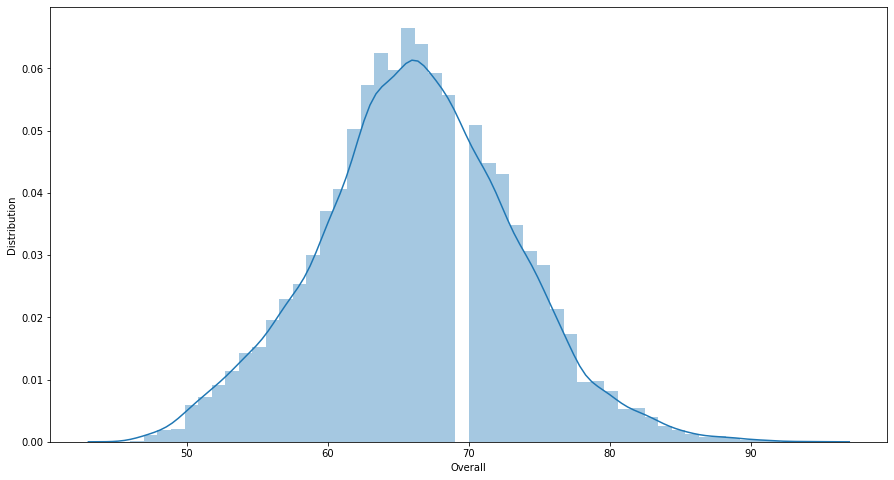

In [23]:
plt.figure(figsize = (15,8))

sns.distplot(df.Overall)
plt.ylabel('Distribution')
plt.show()

This shows that the overall column of the dataset is normally distributed.

# Generated pair plots for the following variables:


In [24]:
selected = df[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']]

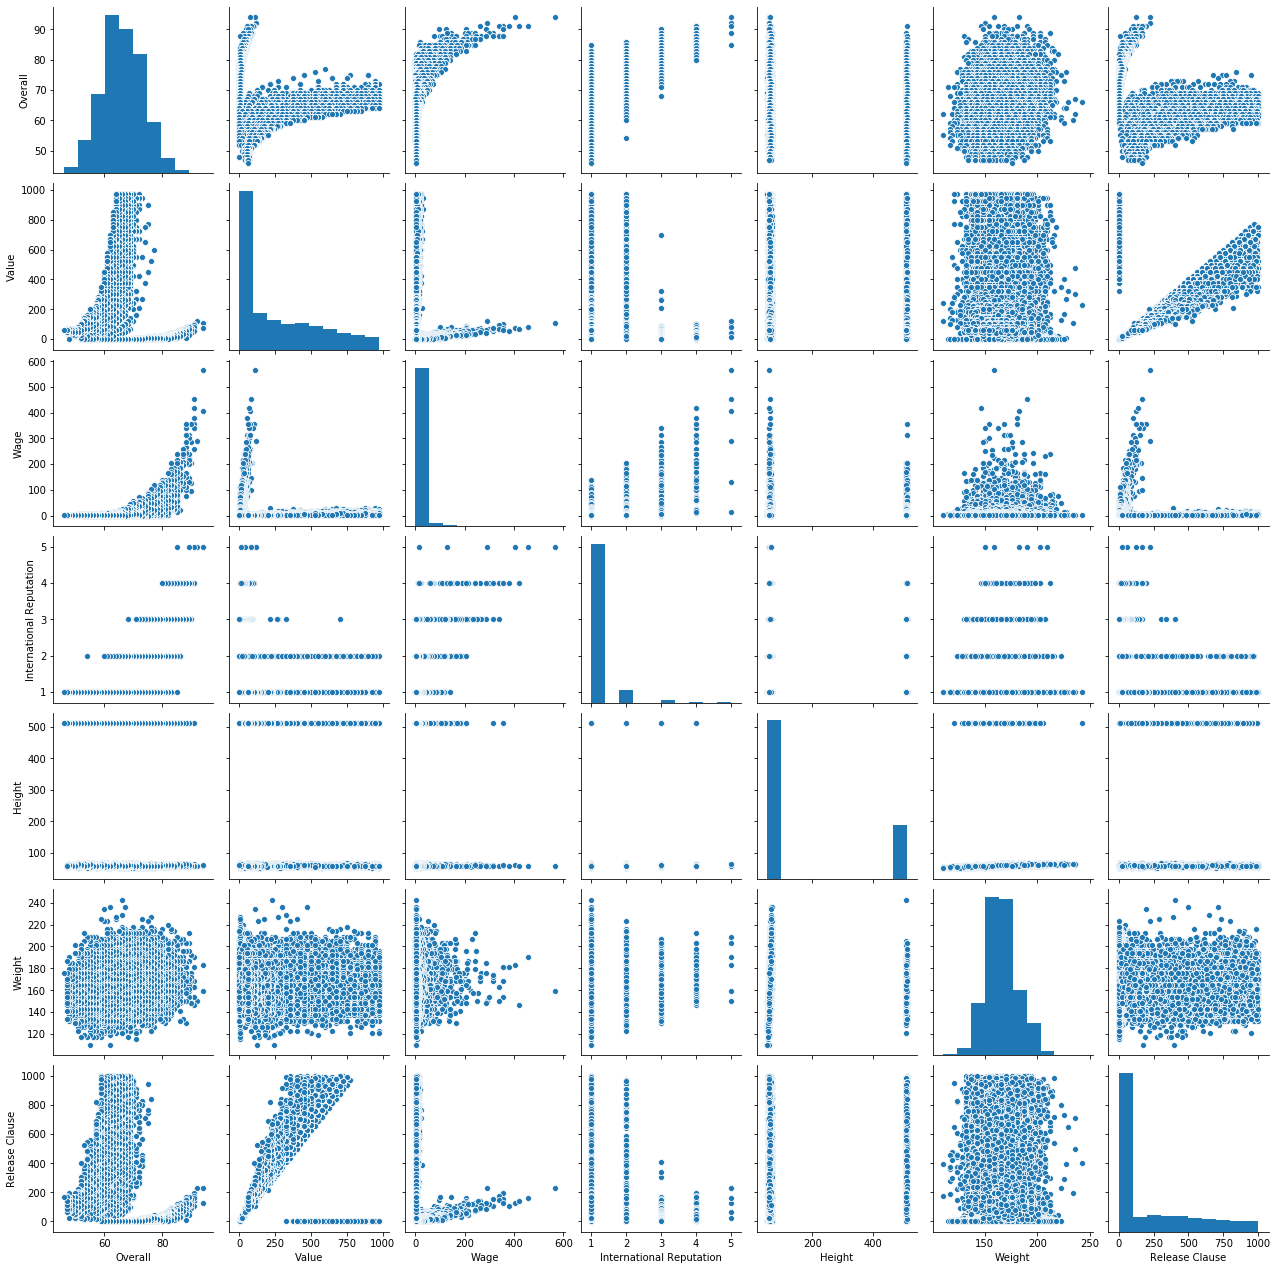

In [25]:
sns.pairplot(selected)
plt.show()

# Grouping of the top 20 players 

In [26]:
Grouped = df[df['Contract Valid Until'] == 2020].sort_values(by = 'Overall', ascending = False).head(20)
Grouped

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72.0,260.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67.0,420.0,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137.4
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51.0,380.0,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104.6
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93.0,340.0,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1
13,168542,David Silva,32,Spain,90,90,Manchester City,60.0,285.0,Left,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60.0,200.0,Right,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27.0,215.0,Left,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44.6
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73.5,205.0,Right,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141.5
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24.0,165.0,Right,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44.4
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45.0,135.0,Right,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76.5


0    205
dtype: int64


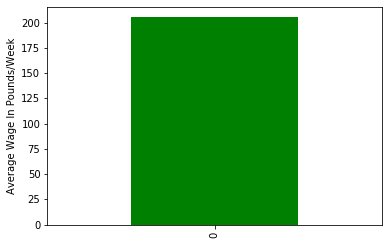

In [27]:
Variable1 = Grouped['Wage'].mean()

Variable1 = round(Variable1)

Average_Wage = pd.Series(Variable1)

print(Average_Wage)

Average_Wage.plot(kind = 'bar', color = 'g')
plt.ylabel('Average Wage In Pounds/Week')
plt.show()

0    31
dtype: int64


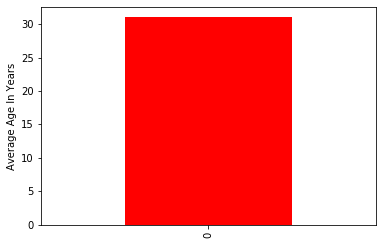

In [28]:
Variable2 = Grouped['Age'].mean()

Variable2 = round(Variable2)

Average_Age = pd.Series(Variable2)

print(Average_Age)

Average_Age.plot(kind = 'bar', color = 'r')
plt.ylabel('Average Age In Years')
plt.show()

In [29]:
Correlation = Grouped[['Overall','Value']].corr()

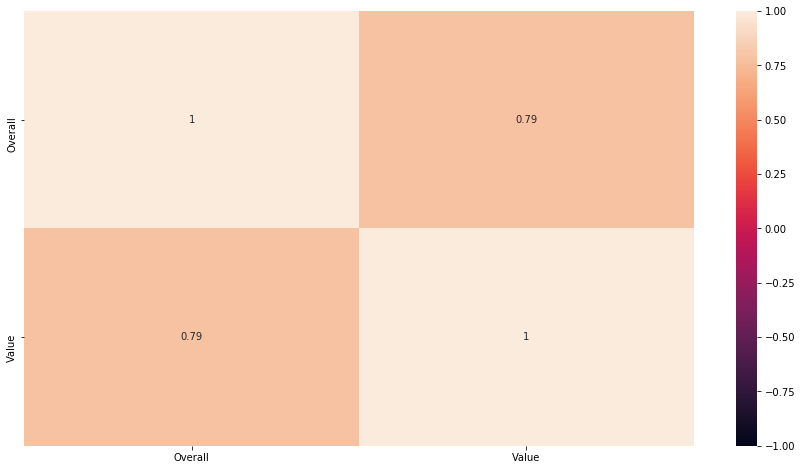

In [30]:
plt.figure(figsize = (15,8))

sns.heatmap(Correlation, annot = True , vmin = -1)

plt.show()

Graph showing strong correlation between Value and Overall.

# Top 5 Players In each Position

In [31]:
pos = df.groupby(['Position'], as_index=False).apply(lambda x: x.nlargest(5, 'Overall'))
pos.head(20)

ID             Name  Age         Nationality  Overall  Potential  \
0 17   194765     A. Griezmann   27              France       89         90   
  31   190460       C. Eriksen   26             Denmark       88         91   
  61   201942  Roberto Firmino   26              Brazil       86         87   
  66   189596        T. Müller   28             Germany       86         86   
  74   176635          M. Özil   29             Germany       86         86   
1 12   182493         D. Godín   32             Uruguay       90         90   
  42   205600        S. Umtiti   24              France       87         92   
  73   177509       M. Benatia   31             Morocco       86         86   
  89   192366      N. Otamendi   30           Argentina       85         85   
  102  171919            Naldo   35              Brazil       85         85   
2 20   189511  Sergio Busquets   29               Spain       89         89   
  27   200145         Casemiro   26              Brazil       88         90   
  72   180206        M. Pjanić   28  Bosnia Herzegovina       86         86   
  75   135507      Fernandinho   33              Brazil       86         86   
  118  209499          Fabinho   24              Brazil       84         88   
3 271  198706     Luis Alberto   25               Spain       82         85   
  293  184431      S. Giovinco   31               Italy       82         82   
  350  205175         A. Milik   24              Poland       81         88   
  382  187072        L. Stindl   29             Germany       81         81   
  407  144622          Raffael   33              Brazil       81         81   

                           Club  Value   Wage Preferred Foot  ...  Composure  \
0 17            Atlético Madrid   78.0  145.0           Left  ...       87.0   
  31          Tottenham Hotspur   73.5  205.0          Right  ...       88.0   
  61                  Liverpool   53.0  195.0          Right  ...       87.0   
  66          FC Bayern München   45.0  135.0          Right  ...       83.0   
  74                    Arsenal   43.5  190.0           Left  ...       82.0   
1 12            Atlético Madrid   44.0  125.0          Right  ...       82.0   
  42               FC Barcelona   57.0  205.0           Left  ...       82.0   
  73                   Juventus   30.0  160.0          Right  ...       82.0   
  89            Manchester City   28.5  170.0          Right  ...       80.0   
  102             FC Schalke 04    9.0   38.0          Right  ...       84.0   
2 20               FC Barcelona   51.5  315.0          Right  ...       90.0   
  27                Real Madrid   59.5  285.0          Right  ...       84.0   
  72                   Juventus   44.0  180.0          Right  ...       86.0   
  75            Manchester City   18.0  185.0          Right  ...       79.0   
  118                 Liverpool   34.0  120.0          Right  ...       84.0   
3 271                     Lazio   28.5   67.0          Right  ...       72.0   
  293                Toronto FC   20.0   15.0          Right  ...       82.0   
  350                    Napoli   25.5   71.0           Left  ...       72.0   
  382  Borussia Mönchengladbach   18.0   43.0          Right  ...       83.0   
  407  Borussia Mönchengladbach   11.0   41.0          Right  ...       79.0   

       Marking  StandingTackle SlidingTackle GKDiving GKHandling  GKKicking  \
0 17      59.0            47.0          48.0     14.0        8.0       14.0   
  31      59.0            57.0          22.0      9.0       14.0        7.0   
  61      60.0            64.0          42.0      8.0       11.0        9.0   
  66      44.0            41.0          44.0      6.0        7.0       11.0   
  74      24.0            16.0          19.0      6.0       14.0       10.0   
1 12      90.0            89.0          89.0      6.0        8.0       15.0   
  42      90.0            89.0          86.0     15.0       10.0       14.0   
  73      89.0            87.0        

In [32]:
pos.groupby(['Name']).filter(lambda x: len(x)>2)

,,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


No player is top in more than One position

In [40]:
Wage = pos.groupby(['Position']).mean()['Wage']
Mean_Wage = pd.DataFrame(Wage)
X = Mean_Wage.index

In [34]:
df_new = Wage.value_counts()

In [35]:
Y = df_new.index

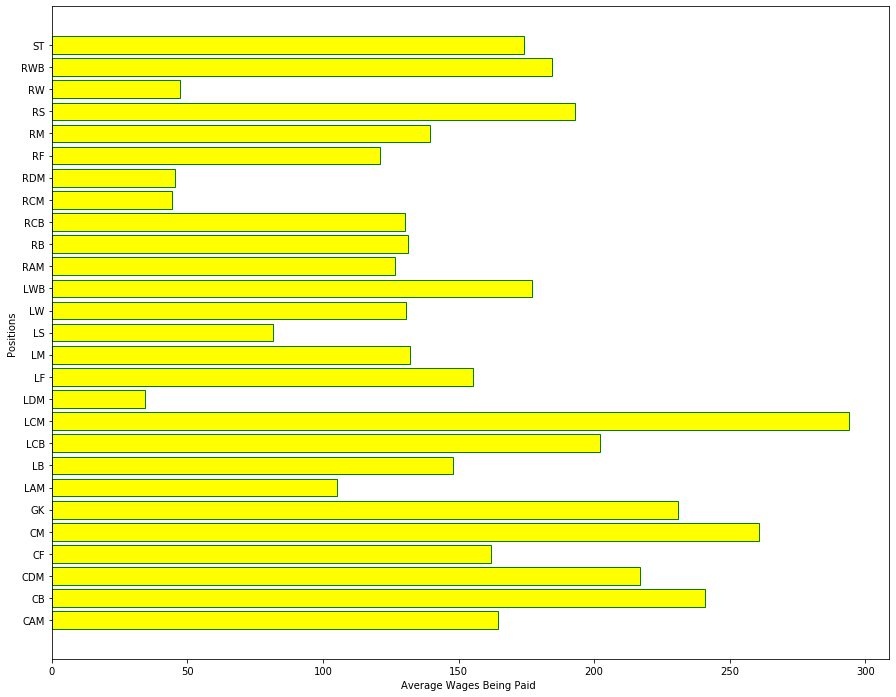

In [41]:
plt.figure(figsize = (15,12))

plt.barh(X,Y, edgecolor = 'green', color = 'yellow')
plt.xlabel("Average Wages Being Paid ")
plt.ylabel("Positions")
plt.show()

# END